<a href="https://colab.research.google.com/github/joselufb/03MAIR-Algoritmos-Optimizacion/blob/main/Algoritmos_AG2_Jose_Luis_Fernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos - Actividad Guiada 2

Nombre: José Luis Fernández Bastida

URL: https://colab.research.google.com/drive/1NZt8mMOPp7hid9A09srmWCJlmHDrzQjm?usp=sharing

GitHub: https://github.com/joselufb/03MAIR-Algoritmos-Optimizacion

## Viaje por el río usando programación dinámica

In [ ]:
import math

# inf = "infinito" para realizar tabla de tarifas de nodos
inf = math.inf

# Se marca infinito para indicar que el desplazamiento entre esos nodos no es posible
TARIFAS = [
[0,5,4,3,inf,inf,inf],      # desde nodo 0
[inf,0,inf,2,3,inf,11],     # desde nodo 1
[inf,inf, 0,1,inf,4,10],    # desde nodo 2
[inf,inf,inf, 0,5,6,9],     # desde nodo 3
[inf,inf, inf,inf,0,inf,4],
[inf,inf, inf,inf,inf,0,3],
[inf,inf,inf,inf,inf,inf,0]]

In [ ]:
def Precios(TARIFAS):
  # Número de nodos del problema
  N = len(TARIFAS[0])
  
  # A partir de N, inicializamos una tabla de precios y rutas a seguir
  PRECIOS = [ [inf] * N for i in [inf] * N]
  RUTA = [[""] * N for i in [""] * N]
  
  for i in range(N - 1):
    for j in range(i + 1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
            RUTA[i][j] = k
        
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

# Imprimimos matriz "Precios" anterior
# Muestra el coste para ir desde un nodo a otro teniendo en cuenta que no se puede ir río arriba
# "inf" indica que ese camino no es posible de realizar
print("PRECIOS:")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

# Imprimimos matriz "Rutas"
# Muestra el mejor camino para ir desde un punto a otro y el punto por el que hay que pasar

# Ejemplo: 3º fila indica los pasos para ir desde nodo 2
# str vacio camino no posible.  Para ir de 2 a 4 hay que pasar por nodo 3, por eso 5º posición = 3
print("\nRUTA:")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS:
[inf, 5, 4, 3, 8, 8, 11]
[inf, inf, inf, 2, 3, 8, 7]
[inf, inf, inf, 1, 6, 4, 7]
[inf, inf, inf, inf, 5, 6, 9]
[inf, inf, inf, inf, inf, inf, 4]
[inf, inf, inf, inf, inf, inf, 3]
[inf, inf, inf, inf, inf, inf, inf]

RUTA:
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
def calcular_ruta(RUTA, desde, hasta):
    # RUTA = matriz obtenida con la función Precios()
    # desde = nodo incial
    # hasta = nodo final

    if desde == hasta:
        return desde 
    else:
        return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 


In [ ]:
print(f"\nLa mejor ruta es: {calcular_ruta(RUTA, 0, 6)}")


La mejor ruta es: 0,0,2,5


## Asignación de tareas usando ramificación y poda

In [ ]:
# Matriz costes, columna = tarea / fila = agente encargado de tarea
COSTES = [
        [11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [ ]:
def valor(S,COSTES):
    # Función que evalua una solución ya sea parcial o final
    # Devuelve el coste total después de asignar todas las tareas

    VALOR = 0
    for i in range(len(S)):
        VALOR += COSTES[S[i]][i] 
    return VALOR

# Ejemplo:  
valor((0, 1, 2, 3), COSTES)

73

In [ ]:
def CI(S, COSTES):
    # Función para calcular la cota inferior para una solución parcial

    VALOR = 0
    # Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    #Estimación
    for i in range(len(S), len(COSTES)):
        VALOR += min([COSTES[j][i] for j in range(len(S), len(COSTES))])
    
    return VALOR


def CS(S, COSTES):
    # Función para calcular la cota superior para una solución parcial

    VALOR = 0
    # Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    #Estimación
    for i in range(len(S), len(COSTES)):
        VALOR += max([COSTES[j][i] for j in range(len(S), len(COSTES))])
    
    return VALOR

In [ ]:
def crear_hijos(NODO, N):
    # Función para generar tantos hijos como como opciones haya para el siguiente elemento de la tupla
    # (0,) -> (0,1), (0,2), (0,3)
    
    HIJOS = []

    for i in range(N ):
        if i not in NODO:
            HIJOS.append({'s':NODO +(i,)})
    
    return HIJOS


In [ ]:
def ramificacion_y_poda(COSTES):
# Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
# Nodos del grafo  { s:(1,2),CI:3,CS:5  }

    DIMENSION = len(COSTES)  
    MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
    CotaSup = valor(MEJOR_SOLUCION,COSTES)
    
    NODOS = []
    NODOS.append({'s':(),'ci':CI((),COSTES)})

    iteracion = 0

    while(len(NODOS) > 0):
        iteracion +=1

        nodo_prometedor = [min(NODOS, key = lambda x:x['ci'])][0]['s']
        
        # Ramificación, se generan los hijos
        HIJOS = [{'s':x['s'],'ci':CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]

        #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
        NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]

        if len(NODO_FINAL ) > 0: 
        #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION])

            if NODO_FINAL[0]['ci'] < CotaSup:
                CotaSup = NODO_FINAL[0]['ci']
                MEJOR_SOLUCION = NODO_FINAL
    
        # Aplicamos la poda
        HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]

        # Añadimos los hijos 
        NODOS.extend(HIJOS) 

        # Eliminamos el nodo ramificado
        NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]

    print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " , DIMENSION)
      


ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## Descenso del gradiente

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
import random

In [2]:
# Función paraboloide a utilizar
f  = lambda X: X[0]**2+X[1]**2
# Gradiente = derivada de la función
df = lambda X: [2*X[0], 2*X[1]]

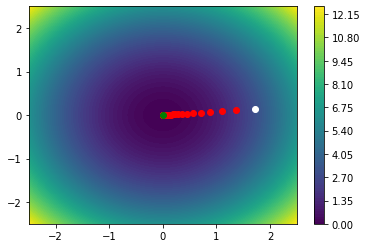

Solucion: [6.016530944082383e-49, 4.755111812014888e-50] 3.642475548454849e-97


In [6]:
# Preparación de los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango = 2.5
X = np.linspace(-rango, rango, resolucion) 
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

# Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar() 

# Generamos un punto aleatorio
P = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(P[0], P[1], "o", c = "white")

# Tasa de aprendizaje
TA = .1 

# Iteraciones
for _ in range(500):
  grad = df(P)
  P[0], P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0], P[1], "o", c = "red")

plt.plot(P[0], P[1], "o", c = "green")
plt.show()
print("Solucion:" , P, f(P))